In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX


## 简单线性回归的实现

只有一个样本特征, 及只有一个变量： y = kx + b

最优化损失函数：

$$
\sum_{i=1}^{m}\left(y^{(i)}-a x^{(i)}-b\right)^{2}
$$

使用最小二乘法问题: 最小化误差的平方

$$
\left\{\begin{array}{l}
a=\frac{\sum_{i=1}^{m}\left(x^{(i)}-\bar{x}\right)\left(y^{(i)}-\bar{y}\right)}{\sum_{i=1}^{m}\left(x^{(i)}-\bar{x}\right)^{2}} \\
\hat{b}=\bar{y}-a \bar{x}
\end{array}\right.
$$



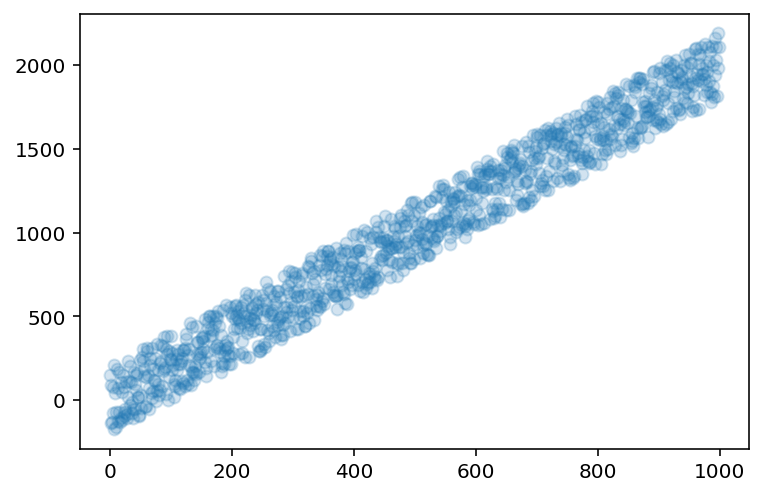

In [2]:
SIZE = 1000
UNDULATE = 200

x = np.arange(SIZE)
y = x * 2 + np.random.randint(-UNDULATE, UNDULATE, size=SIZE)

plt.scatter(x, y, alpha=0.2)
plt.show()


### 线性回归实现

In [3]:
class SimpleLinearRegression():
    """ 简单线性会回归 """
    def __init__(self):
        self.a = 0
        self.b = 0
    
    def fit(self, x, y):
        x_avg = x.mean()
        y_avg = y.mean()

        molecule = 0
        for x_item, y_item in zip(x, y):
            molecule += (x_item-x_avg) * (y_item-y_avg)

        denominator = 0
        for item in x:
            denominator += pow((item-x_avg), 2)

        self.a = molecule / denominator
        self.b = y_avg - self.a * x_avg

    def predict(self, x):
        return x * self.a + self.b    


CPU times: user 12 ms, sys: 991 µs, total: 13 ms
Wall time: 21.8 ms
a= 2.0196268956268955
b= -8.947634365634258


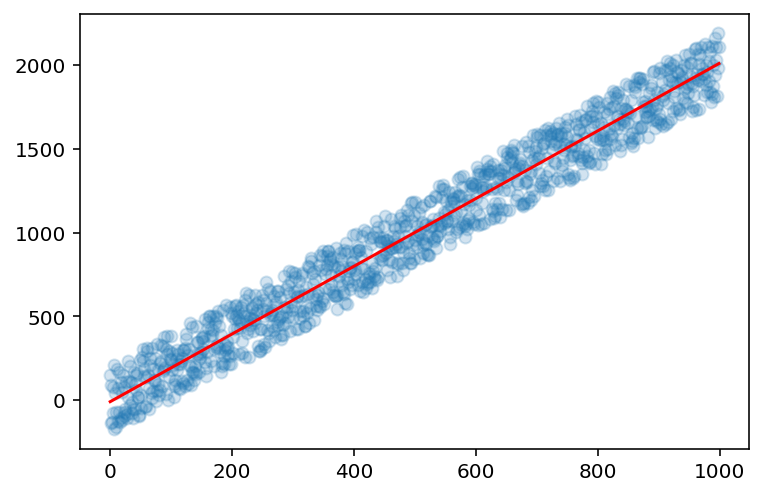

In [4]:
obj =  SimpleLinearRegression()
%time obj.fit(x, y)
y_predict = obj.predict(x)

print('a=', obj.a)
print('b=', obj.b)

plt.scatter(x, y, alpha=0.2)
plt.plot(x, y_predict, color='r')
plt.show()

### 使用向量计算优化
使用向量计算，避免走循环计算。可以大幅度提高效率。

In [5]:
class SimpleLinearRegression2():
    """ 简单线性会回归(向量实现) """    
    def __init__(self):
        self.a = 0
        self.b = 0
    
    def fit(self, x, y):
        x_avg = x.mean()
        y_avg = y.mean()

        molecule = np.dot(x-x_avg, y-y_avg)
        denominator = np.dot(x-x_avg, x-x_avg)

        self.a = molecule / denominator
        self.b = y_avg - self.a * x_avg

    def predict(self, x):
        return x * self.a + self.b    


CPU times: user 150 µs, sys: 31 µs, total: 181 µs
Wall time: 171 µs
a= 2.0196268956268955
b= -8.947634365634258


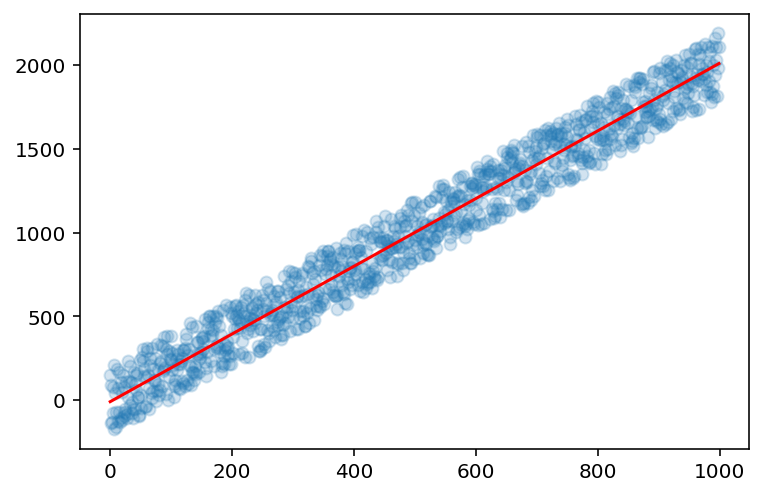

In [6]:
obj =  SimpleLinearRegression2()
%time obj.fit(x, y)
y_predict = obj.predict(x)

print('a=', obj.a)
print('b=', obj.b)

plt.scatter(x, y, alpha=0.2)
plt.plot(x, y_predict, color='r')
plt.show()

## 模型评价

### MSE

$$
\frac{1}{m} \sum_{i=1}^{m}\left(y_{t e s t}^{(i)}-\hat{y}_{t e s t}^{(i)}\right)^{2}
$$

In [7]:
np.dot(y_predict - y, y_predict - y) / len(y)

13331.762043438834

### RMSE

$$
\sqrt{\frac{1}{m} \sum_{i=1}^{m}\left(y_{\text {tare }}^{(10)}-\dot{y}_{\text {irst }}^{(i)}\right)^{2}}=\sqrt{M S E_{\text {tert }}}
$$

In [8]:
import math
math.sqrt(np.dot(y_predict - y, y_predict - y) / len(y))

115.46324975263269

### MAE

$$
\frac{1}{m} \sum_{i=1}^{m}\left|y_{t e s t}^{(i)}-\hat{y}_{t e s t}^{(i)}\right|
$$

In [9]:
np.sum(np.absolute(y-y_predict)) / len(y)

100.00258301338302

### R Square

$$
1-\frac{M S E(\hat{y}, y)}{\operatorname{Var}(y)}
$$

In [10]:
1 - np.dot(y_predict - y, y_predict - y)/len(y)/np.var(y) 

0.9622585383166963

## 多元线性回归

使目标函数尽可能小: 
$$
\sum_{i=1}^{m}\left(y^{(i)}-\hat{y}^{(i)}\right)^{2}
$$


$$
\left\{\begin{array}{l}
X_{0}^{(i)}=1 \\
\hat{y}^{(i)}=\theta_{0} X_{0}^{(i)}+\theta_{1} X_{1}^{(i)}+\theta_{2} X_{2}^{(i)}+\ldots+\theta_{n} X_{n}^{(i)}
\end{array}\right.
$$

=>

$$
\left\{\begin{array}
\hat \theta=\left(\theta_{0}, \theta_{1}, \theta_{2}, \ldots, \theta_{n}\right)^{T} \\
\hat X^{(i)}=\left(X_{0}^{(i)}, X_{1}^{(i)}, X_{2}^{(i)}, \ldots, X_{n}^{(i)}\right) \\
\hat{y}^{(i)}=X^{(i)} \cdot \theta  \\
\end{array}\right.
$$

=>

$$
X_{b}=\left(\begin{array}{ccccc}
1 & X_{1}^{(1)} & X_{2}^{(1)} & \ldots & X_{n}^{(1)} \\
1 & X_{1}^{(2)} & X_{2}^{(2)} & \ldots & X_{n}^{(2)} \\
\ldots & & & & \ldots \\
1 & X_{1}^{(m)} & X_{2}^{(m)} & \ldots & X_{n}^{(m)}
\end{array}\right) \quad \theta=\left(\begin{array}{c}
\theta_{0} \\
\theta_{1} \\
\theta_{2} \\
\ldots \\
\theta_{n}
\end{array}\right)
$$

$$
\hat{y}=X_{b} \cdot \theta
$$

=> 最终推导出(多元线性回归的正规方程解(Normal Euqation))

$$
\theta=\left(X_{b}^{T} X_{b}\right)^{-1} X_{b}^{T} y \\
\hat{y}=X_{b} \cdot \theta
$$

- 优点: 不需要对数据做归一化处理
- 缺点: 时间复杂度高 O(n^3) 优化到O(n^2.4)


In [11]:
class LinearRegression:
    def __init__(self):
        self._thetas = None
        # 截距
        self.intercept = None
        # 参数系数
        self.coefs = None

    def fit(self, x_train, y_train):
        raise NotImplementedError

    def predict(self, x_predict):
        raise NotImplementedError

    @staticmethod
    def score(y, y_predict):
        """R评价"""
        return 1 - np.dot(y_predict - y, y_predict - y) / len(y) / np.var(y)


class LinearRegressionNormal(LinearRegression):
    """线性回归 """
    def fit(self, x_train, y_train):
        # 矩阵第一列填充1
        X_b = np.hstack([np.ones((len(x_train), 1)), x_train])
        # np.linalg.inv求逆矩阵
        self._theta = np.linalg.inv(np.dot(X_b.T, X_b)).dot(X_b.T).dot(y_train)
        self.intercept = self._theta[0]
        self.coef = self._theta[1:]

        return self

    def predict(self, x_predict):
        X_b = np.hstack([np.ones((len(x_predict), 1)), x_predict])
        return np.dot(X_b, self._theta)

In [12]:
# 使用波士顿房价数据测试
from sklearn import datasets
from sklearn.linear_model import LinearRegression

# 加载数据
boston = datasets.load_boston()
train_x_df = boston['data']
train_y_df = boston['target']

estimator = LinearRegressionNormal()
estimator.fit(train_x_df, train_y_df)
predit_y_df = estimator.predict(train_x_df)
print('---- LinearRegressionNormal ----')
print('intercept: ', estimator.intercept)
print('coef: ', estimator.coef)
print('score:', estimator.score(train_y_df, predit_y_df))

estimator = LinearRegression()
estimator.fit(train_x_df, train_y_df)
predit_y_df = estimator.predict(train_x_df)
print('\n---- SkleanLinerRegression ----')
print('intercept: ', estimator.intercept_)
print('coef: ', estimator.coef_)
print('score:', estimator.score(train_x_df, train_y_df))


---- LinearRegressionNormal ----
intercept:  36.45948838506836
coef:  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
score: 0.7406426641094095

---- SkleanLinerRegression ----
intercept:  36.459488385090125
coef:  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
score: 0.7406426641094095


自定义实现的线性回归算法与sklean关键几个参数值一样。同时线性回归学习到的参数值对数据具有较强的解释性.

## 较强的解释性
线性回归学习到的参数值对数据具有较强的解释性.

In [13]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
df = pd.DataFrame({
    'feature': boston['feature_names'][np.argsort(estimator.coef_)],
    'value':estimator.coef_[np.argsort(estimator.coef_)]
})
df

,feature,value
0,NOX,-17.766611
1,DIS,-1.475567
2,PTRATIO,-0.952747
3,LSTAT,-0.524758
4,CRIM,-0.108011
5,TAX,-0.012335
6,AGE,0.000692
7,B,0.009312
8,INDUS,0.020559
9,ZN,0.046420


根据学习到的参数可以发现: 

- 正相关最大值为RM(房间个数)，即房间数越大,房价越贵，且正相关性最强。
- 负相关最大值NOX(一氧化氮浓度)，即NOX越大,房价越便宜，且负相关性最强。